In [1]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
df = pd.read_csv(r'C:\Users\micky\Desktop\碩士\109-2\MahcineLearning\Course 2- Unsupervised Learning\Grains\Grains\seeds.csv',
                names = ['f0','f1','f2','f3','f4','f5','f6','type'])
df.head()

,f0,f1,f2,f3,f4,f5,f6,type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


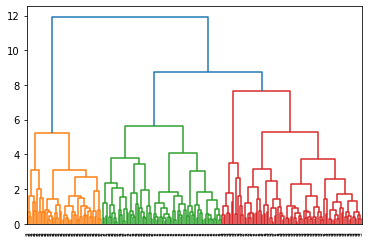

In [6]:
#畫出凝聚式階層聚類
# Calculate the linkage: mergings
mergings = linkage(df.loc[:,'f0':'f6'], method = 'complete')
target = df['type'].tolist()
# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=target,
           leaf_rotation=90,
           leaf_font_size=6)
plt.show()

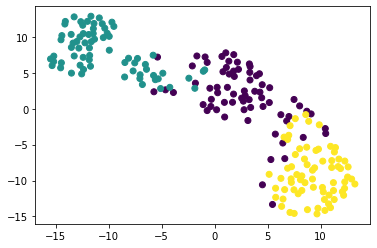

In [10]:
# 用t-sne來分析我們的資料，處理高維度的資料時很好用
from sklearn.manifold import TSNE

model = TSNE(learning_rate = 200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(df.loc[:,'f0':'f6'],df['type'])

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs, ys, c = target)
plt.show()


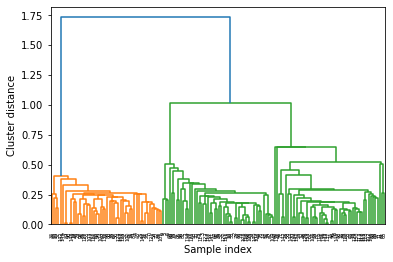

In [8]:
#將計算linkage的方法改完single試試看
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples = 150,
                 n_features = 2,
                 centers = 3,
                 cluster_std = 0.5,
                 random_state = 0)
Complete = linkage(X, method = 'single', metric = 'euclidean')
dendrogram(Complete)
ax = plt.gca()
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")
plt.show()